## 1. Importação das Bibliotecas e Carregamento dos Dados

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Configurações de visualização
plt.style.use('seaborn')
sns.set_palette('Set2')
pd.set_option('display.max_columns', None)

/tmp/ipykernel_140426/615367719.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [30]:
# Carregar os dados
df = pd.read_excel('/home/fause/ML-Transportes/Dados/analiseestatistica_indicadores2.xlsx') 
print("Dimensões do dataset:", df.shape)
df.head()

Dimensões do dataset: (5570, 27)


,UF,Estado,codigo_ibge,Integrado ao SNT,Sinistros,Z-score Sinistros,População,Z-score população,Soma da Arrecadação 2018-2023,Z-score Arrecadação,PIB,Z-score PIB,PIB per capita,Z-score PIB per capita,Taxa de alfabetização +15 anos,Tx de Alfabetização +15 anos,Z-score Tx Afabetização,IDHM,Z-score IDHM,Taxa de Admissão em Empregos,300,Taxa de Óbitos/100 mil habitantes,Z-score Tx óbito/100 mil hab,% de Óbitos/Sinistros,Z-score Óbitos/Sinistros,area_km2,km_rodovias_federais
0,RO,Rondônia,1100015,Não,1102,-0.006384,21494,-0.072467,3.291565e+09,-0.076026,2.620769e+08,-0.058931,12193.024937,0.018950,91.59,0.9159,0.448016,0.641,-0.217690,0.509897,-0.094854,162.836140,1.001660,3.176044,-0.600753,7067.127,0.000000
1,RO,Rondônia,1100023,Sim,5622,0.453483,96833,0.292338,1.718637e+10,0.164665,1.364694e+09,0.090208,14093.271715,0.169636,94.08,0.9408,0.777358,0.702,0.567787,0.505000,-0.172360,171.429162,1.122970,2.952686,-0.607705,4426.143,77.806543
2,RO,Rondônia,1100031,Não,185,-0.099680,5351,-0.150634,1.672614e+09,-0.104070,6.961111e+07,-0.084964,13008.991590,0.083655,89.82,0.8982,0.213906,0.650,-0.101800,0.515403,-0.007693,224.257148,1.868761,6.486486,-0.497720,1314.352,0.000000
3,RO,Rondônia,1100049,Sim,5957,0.487566,86887,0.244178,1.279220e+10,0.088548,1.186494e+09,0.066105,13655.599698,0.134930,93.71,0.9371,0.728420,0.718,0.773814,0.511808,-0.064596,159.977902,0.961309,2.333389,-0.626980,3793.000,51.712641
4,RO,Rondônia,1100056,Não,732,-0.044028,15890,-0.099602,3.614702e+09,-0.070429,2.220212e+08,-0.064349,13972.384456,0.160050,92.15,0.9215,0.522085,0.692,0.439020,0.500262,-0.247362,195.091252,1.457016,4.234973,-0.567796,2783.297,29.154767


In [31]:
df.dropna(inplace=True)


print(df[['area_km2', 'km_rodovias_federais']].isnull().sum())


area_km2                0
km_rodovias_federais    0
dtype: int64


In [32]:
# Criar a coluna "Porte"
def categorizar_populacao(pop):
    if pop < 20000:
        return 'Pequeno'
    elif pop < 100000:
        return 'Médio'
    elif pop < 500000:
        return 'Grande'
    else:
        return 'Metrópole'

df['Porte'] = df['População'].apply(categorizar_populacao)

In [33]:
# One-hot encoding da variável categórica 'Porte'
df = pd.get_dummies(df, columns=['Porte'], drop_first=True)

## 3. Preparação dos Dados e Modelagem

In [34]:
# Definir features (X) e target (y)
base_features = ['Sinistros', 'PIB per capita', 'Tx de Alfabetização +15 anos',
                 'Taxa de Admissão em Empregos', 'IDHM',
                 'Taxa de Óbitos/100 mil habitantes', '% de Óbitos/Sinistros',
                 'area_km2', 'km_rodovias_federais']

In [35]:

# Incluir as colunas de porte codificadas
porte_features = [col for col in df.columns if str(col).startswith('Porte_')]

features = base_features + porte_features

In [36]:
X = df[features]
y = df['Integrado ao SNT'].map({'Sim': 1, 'Não': 0})

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputação e padronização
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [37]:
# Balanceamento com SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [38]:
# Treinamento do modelo
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


# Predição
y_pred = rf_model.predict(X_test_scaled)

# Avaliação geral
print("\nRelatório de Classificação Geral:\n")
print(classification_report(y_test, y_pred))



Relatório de Classificação Geral:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       718
           1       0.81      0.81      0.81       378

    accuracy                           0.87      1096
   macro avg       0.85      0.85      0.85      1096
weighted avg       0.87      0.87      0.87      1096



In [39]:
# Adicionando predições ao DataFrame de teste
X_test_full = X_test.copy()
X_test_full['y_true'] = y_test.values
X_test_full['y_pred'] = y_pred
X_test_full['População'] = df.loc[X_test.index, 'População']

# Reconstituir o porte original (caso queira usar nos relatórios por grupo)
X_test_full['Porte'] = df.loc[X_test.index, 'População'].apply(categorizar_populacao)


In [40]:
# Avaliação por grupo (opcional)
for porte in X_test_full['Porte'].unique():
    subset = X_test_full[X_test_full['Porte'] == porte]
    print(f"\n--- Avaliação para: {porte} ---")
    print(classification_report(subset['y_true'], subset['y_pred']))



--- Avaliação para: Pequeno ---
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       621
           1       0.76      0.60      0.67       141

    accuracy                           0.89       762
   macro avg       0.84      0.78      0.80       762
weighted avg       0.89      0.89      0.89       762


--- Avaliação para: Médio ---
              precision    recall  f1-score   support

           0       0.76      0.53      0.63        96
           1       0.77      0.90      0.83       168

    accuracy                           0.77       264
   macro avg       0.77      0.72      0.73       264
weighted avg       0.77      0.77      0.76       264


--- Avaliação para: Grande ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        59

    accuracy                           0.98        60
   macro avg       0.49      0.5

/home/fause/ML-Transportes/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fause/ML-Transportes/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fause/ML-Transportes/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

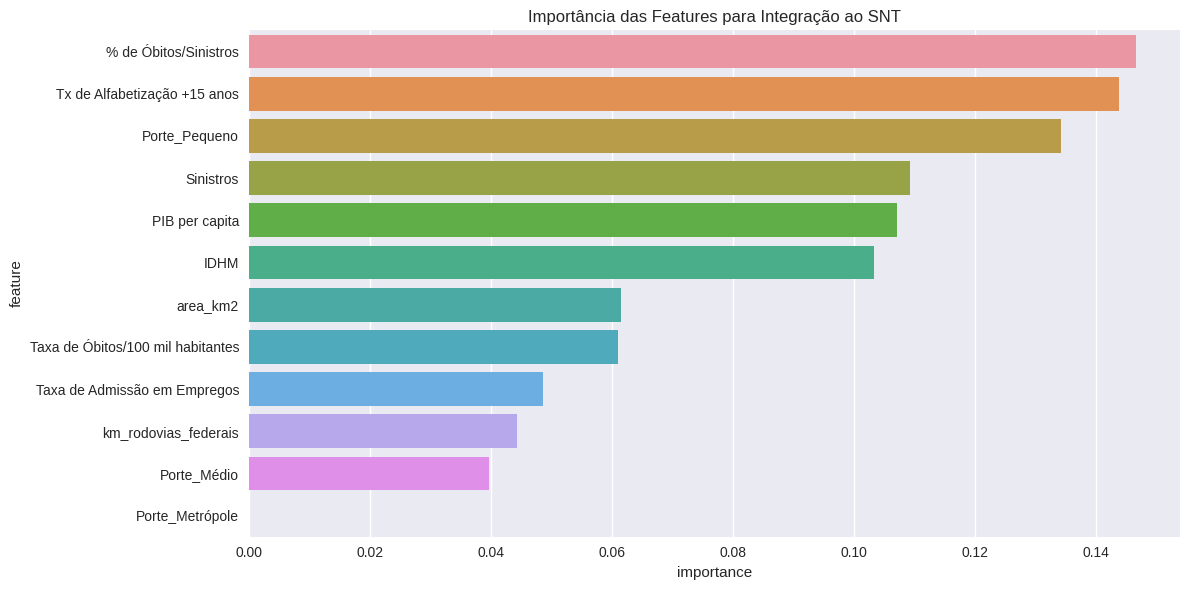


Importância das Features (%):

                              feature  importance
6               % de Óbitos/Sinistros       14.66
2        Tx de Alfabetização +15 anos       14.39
11                      Porte_Pequeno       13.42
0                           Sinistros       10.94
1                      PIB per capita       10.71
4                                IDHM       10.34
7                            area_km2        6.15
5   Taxa de Óbitos/100 mil habitantes        6.10
3        Taxa de Admissão em Empregos        4.87
8                km_rodovias_federais        4.43
10                        Porte_Médio        3.98
9                     Porte_Metrópole        0.01


In [41]:
# Importância das features
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importância das Features para Integração ao SNT')
plt.tight_layout()
plt.show()

print("\nImportância das Features (%):\n")
print(feature_importance.assign(importance=lambda x: x['importance'] * 100).round(2))